Load Data and concate to df_meta

In [40]:
!pip install python-dateutil


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [87]:
import pandas as pd
import os, glob
import numpy as np
folder = "DATA"
path = os.path.join(folder, "*.csv")
all_CSVs = glob.glob(path)
#print(path)
#print(all_CSVs)
#load all dfs an merge to one
df_meta = []
all_channel_names = []
df_meta = pd.DataFrame(df_meta)
for csv in all_CSVs: 
    print(csv)
    filename = os.path.basename(csv)
    if filename[-13:] == "automated.csv":
        channelName = filename.replace(filename[-14:], "")
        df = pd.read_csv(csv)
        df["Channel"]= channelName
        index = [i for i in range(len(df))]
        df.set_index([index, 'Channel'], inplace= True)
        #display(df)
        frames = [df_meta, df]
        df_meta = pd.concat(frames)
        if channelName not in all_channel_names:
            all_channel_names.append(channelName)
display("Das sind alle Kanäle")
display(all_channel_names)


DATA\ALLESUNDNICHTS_automated.csv
DATA\ALLESUNDNICHTS_manuel.csv
DATA\Der Wahrheit verpflichtet_automated.csv
DATA\Der Wahrheit verpflichtet_manuel.csv
DATA\Der Weg in deine Freiheit_automated.csv
DATA\Der Weg in deine Freiheit_manuel.csv
DATA\DRACHENTÖTER TV_automated.csv
DATA\DRACHENTÖTER TV_manuel.csv
DATA\Rettung der Menschheit TV_automated.csv
DATA\Rettung der Menschheit TV_manuel.csv
DATA\Schöpferwissen TV_automated.csv
DATA\Schöpferwissen TV_manuel.csv
DATA\UBC TV_automated.csv
DATA\UBC TV_manuel.csv
DATA\VEIT CLUB_automated.csv
DATA\VEIT CLUB_manuel.csv


'Das sind alle Kanäle'

['ALLESUNDNICHTS',
 'Der Wahrheit verpflichtet',
 'Der Weg in deine Freiheit',
 'DRACHENTÖTER TV',
 'Rettung der Menschheit TV',
 'Schöpferwissen TV',
 'UBC TV',
 'VEIT CLUB']

Tricks:

In [108]:
#get only one channel
df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
df_meta.columns

Index(['publish_date', 'id', 'title', 'description', 'keywords', 'length',
       'views', 'age_restricted', 'yt_caption_info', 'yt_caption_tracks',
       'vid_info', 'Unnamed: 0'],
      dtype='object')

## Compare Channels

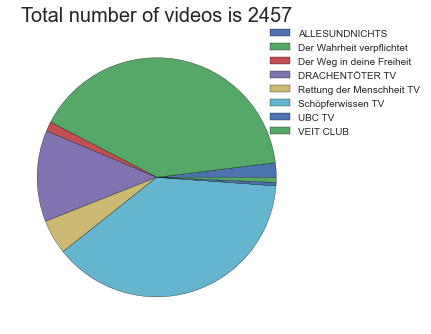

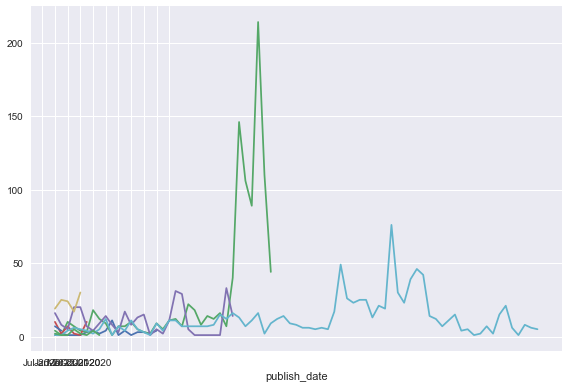

In [114]:
import matplotlib.pyplot as plt
import datetime as date
import dateutil
Title = "Total number of videos is "+ str(len(df_meta))  
#TO ADD letztes Upload              
number_of_vids =[]
for name in all_channel_names:
    number_of_vids.append(len(df_meta.loc[df_meta.index.get_level_values("Channel") == name]));
cumsum = np.cumsum(number_of_vids)
explode = [0.1]*8
              


Title = "Total number of videos is "+ str(len(df_meta)) 
fi1, ax1 = plt.subplots(nrows=1, ncols =1)
fi2, ax2 = plt.subplots(nrows=1, ncols =1)
#ax1.title(Title)
ax1.set_title(Title, loc="center",fontsize=20)
ax1.pie(number_of_vids, radius=1, wedgeprops={ "edgecolor": "black"}, textprops={'fontsize': 11})
ax1.legend(all_channel_names, bbox_to_anchor=(0.85,1.025), loc="upper left")
"""

df_date = df_meta.loc[:, "publish_date"]
first_release = dateutil.parser.parse(df_date.min())
today = date.datetime.now()
timespan = today-first_release
#np.linspace(0,time, )
datem =date.datetime(today.year, today.month, 1)
print(datem)
for date in df_date:
    cur_date = dateutil.parser.parse(date)
    
    if cur_date.year == 2022: 
        print("yes")

    """
"""df = df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
df.groupby(pd.to_datetime(df["publish_date"]).dt.strftime('%b-%Y'), sort=False)["title"].size().plot()"""

for channel in all_channel_names:
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == channel]
    df.groupby(pd.to_datetime(df["publish_date"]).dt.strftime('%b-%Y'), sort=False
              )["title"].size().plot().scatter


#df.groupby(pd.to_datetime(df['Date']).dt.strftime('%b-%Y'), sort=False)['Rep'].size().plot()
ax2.plot()
plt.style.use("seaborn")
plt.tight_layout()
plt.show()